# Integrantes
- nome : Bruno Eduardo Caputo Paulino, Juan Pinheiro
- rms : 558303, 552202

## Dataset abordado: Super herois
colunas :
- id: Um identificador único para cada personagem.
- name: O pseudônimo ou codinome do super-herói.
- intelligence: Uma representação numérica do nível de inteligência do personagem.
- strength: Um valor numérico que representa a força física do personagem.
- speed: Uma representação numérica de quão rápido o personagem pode se mover.
- durable: Uma medida da resiliência do personagem e capacidade de suportar danos.
- power: Um valor numérico que representa o poder ou as habilidades gerais do personagem.
- combat: Uma pontuação que descreve as habilidades e a experiência de combate do personagem.
- full-name: O nome real ou completo do personagem, em oposição ao seu pseudônimo de super-herói.
- alter-egos: Quaisquer outras identidades que o personagem tenha usado.
- aliases: Nomes ou títulos alternativos pelos quais o personagem é conhecido.
- place-of-birth: O local onde o personagem nasceu ou foi criado.
- first-appearance: A edição ou mídia em quadrinhos na qual o personagem fez sua primeira aparição.
- publisher: A empresa responsável por criar e publicar o personagem.
- align: Se o personagem é bom, mau ou neutro.
gender: O gênero do personagem.
- race: A espécie ou raça do personagem (por exemplo, humano, mutante, alienígena).
- height: A altura do personagem, geralmente dada em pés e centímetros.
- weight: O peso do personagem, geralmente fornecido em libras e quilogramas.
- eye-color: A cor dos olhos do personagem.
- hair-color: A cor do cabelo do personagem.
- occupation: O trabalho ou papel principal do personagem, antes ou ao lado de suas atividades de super-herói.
- base: O local principal de onde o personagem opera.
- group-affiliation: Equipes, organizações ou alianças das quais o personagem faz parte.
- parents: Membros importantes da família relacionados ao personagem.

## Import

In [76]:
!pip install transformers
!pip install datasets

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from transformers import AutoTokenizer
from transformers import AutoTokenizer, AutoModelForCausalLM, Trainer, TrainingArguments, DataCollatorForLanguageModeling
from datasets import Dataset

## Introdução ao dataset

In [78]:
# salvando dataset em variavel
data = pd.read_csv("superheroes_data.csv")

In [79]:
# pegando informações basicas do dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 731 non-null    int64  
 1   name               731 non-null    object 
 2   intelligence       566 non-null    float64
 3   strength           629 non-null    float64
 4   speed              566 non-null    float64
 5   durability         566 non-null    float64
 6   power              566 non-null    float64
 7   combat             566 non-null    float64
 8   full-name          630 non-null    object 
 9   alter-egos         731 non-null    object 
 10  aliases            731 non-null    object 
 11  place-of-birth     731 non-null    object 
 12  first-appearance   731 non-null    object 
 13  publisher          716 non-null    object 
 14  alignment          731 non-null    object 
 15  gender             731 non-null    object 
 16  race               429 non

In [80]:
#tratando dados faltantes
data = data.dropna()

In [81]:
data.head(10)

,id,name,intelligence,strength,speed,durability,power,combat,full-name,alter-egos,...,race,height,weight,eye-color,hair-color,occupation,base,group-affiliation,relatives,url
0,1,A-Bomb,38.0,100.0,17.0,80.0,24.0,64.0,Richard Milhouse Jones,No alter egos found.,...,Human,"[""6'8"", '203 cm']","['980 lb', '441 kg']",Yellow,No Hair,"Musician, adventurer, author; formerly talk sh...",-,"Hulk Family; Excelsior (sponsor), Avengers (ho...",Marlo Chandler-Jones (wife); Polly (aunt); Mrs...,https://www.superherodb.com/pictures2/portrait...
1,2,Abe Sapien,88.0,28.0,35.0,65.0,100.0,85.0,Abraham Sapien,No alter egos found.,...,Icthyo Sapien,"[""6'3"", '191 cm']","['145 lb', '65 kg']",Blue,No Hair,Paranormal Investigator,-,Bureau for Paranormal Research and Defense,"Edith Howard (wife, deceased)",https://www.superherodb.com/pictures2/portrait...
3,4,Abomination,63.0,80.0,53.0,90.0,62.0,95.0,Emil Blonsky,No alter egos found.,...,Human / Radiation,"[""6'8"", '203 cm']","['980 lb', '441 kg']",Green,No Hair,Ex-Spy,Mobile,former member of the crew of the Andromeda Sta...,"Nadia Dornova Blonsky (wife, separated)",https://www.superherodb.com/pictures2/portrait...
4,5,Abraxas,88.0,63.0,83.0,100.0,100.0,55.0,Abraxas,No alter egos found.,...,Cosmic Entity,"['-', '0 cm']","['- lb', '0 kg']",Blue,Black,Dimensional destroyer,-,Cosmic Beings,"Eternity (""Father"")",https://www.superherodb.com/pictures2/portrait...
5,6,Absorbing Man,38.0,80.0,25.0,100.0,98.0,64.0,Carl Creel,No alter egos found.,...,Human,"[""6'4"", '193 cm']","['270 lb', '122 kg']",Blue,No Hair,Professional criminal; former professional boxer,-,"Masters of Evil, Lethal Legion; formerly Worth...",Mary MacPherran (Titania) (wife); Jerry Sledge...,https://www.superherodb.com/pictures2/portrait...
7,8,Adam Strange,69.0,10.0,33.0,40.0,37.0,50.0,Adam Strange,No alter egos found.,...,Human,"[""6'1"", '185 cm']","['195 lb', '88 kg']",Blue,Blond,"Adventurer, archaelogist, ambassador","Rann, Alpha Centauri System","Omega Men, L.E.G.I.O.N., R.E.B.E.L.S., formerl...",Alanna Strange (wife); Aleea Strange (daughter...,https://www.superherodb.com/pictures2/portrait...
9,10,Agent Bob,10.0,8.0,13.0,5.0,5.0,20.0,Bob,No alter egos found.,...,Human,"[""5'10"", '178 cm']","['181 lb', '81 kg']",Brown,Brown,"Mercenary, janitor; former pirate, terrorist","Mobile; formerly Manhattan, Hellcarrier","A.I.M., Deadpool; formerly Agency X, Hydra",Allison (ex-wife); Terry and Howie (sons),https://www.superherodb.com/pictures2/portrait...
12,13,Ajax,56.0,48.0,35.0,80.0,34.0,55.0,Francis,No alter egos found.,...,Cyborg,"[""6'4"", '193 cm']","['200 lb', '90 kg']",Brown,Black,-,-,Formerly Weapon X,-,https://www.superherodb.com/pictures2/portrait...
14,15,Alex Mercer,50.0,80.0,42.0,90.0,100.0,50.0,Alexander J. Mercer,No alter egos found.,...,Human,"['-', '0 cm']","['- lb', '0 kg']",-,-,-,-,"Gentek, The Infected",Dana Mercer (sister),https://www.superherodb.com/pictures2/portrait...
16,17,Alfred Pennyworth,63.0,10.0,17.0,10.0,7.0,55.0,Alfred Thaddeus Crane Pennyworth,No alter egos found.,...,Human,"[""5'10"", '178 cm']","['160 lb', '72 kg']",Blue,Black,"Butler; Caretaker, former Actor; Field Medic; ...",Wayne Manor; Batcave; Gotham City,"Batman Family, Outsiders","Jarvis Pennyworth (father, deceased), Wilfred ...",https://www.superherodb.com/pictures2/portrait...


In [82]:
data.describe()

,id,intelligence,strength,speed,durability,power,combat
count,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000
mean,375.879213,67.132022,43.502809,42.185393,61.264045,66.766854,64.483146
std,208.619350,19.361265,33.606379,24.998578,29.438749,30.005523,22.828380
min,1.000000,6.000000,4.000000,8.000000,5.000000,5.000000,5.000000
25%,208.750000,54.500000,11.000000,23.000000,30.000000,39.000000,50.000000
50%,372.500000,63.000000,32.000000,33.000000,64.000000,69.500000,65.000000
75%,563.250000,81.000000,80.000000,53.250000,90.000000,100.000000,80.000000
max,730.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [83]:
data.groupby("race")[['intelligence', 'strength', 'speed', 'durability', 'power', 'combat']].mean()

,intelligence,strength,speed,durability,power,combat
race,,,,,,
Alien,61.500000,70.500000,59.666667,70.000000,92.333333,47.666667
Alpha,63.000000,5.000000,8.000000,10.000000,54.000000,10.000000
Amazon,88.000000,100.000000,79.000000,100.000000,100.000000,100.000000
Android,87.571429,58.142857,43.285714,82.857143,86.000000,62.571429
Animal,50.000000,46.500000,36.500000,59.000000,57.000000,52.000000
Asgardian,73.750000,84.000000,66.500000,87.250000,100.000000,75.000000
Atlantean,65.000000,69.600000,67.400000,69.000000,89.200000,73.000000
Bizarro,38.000000,95.000000,100.000000,100.000000,100.000000,85.000000
Black Racer,88.000000,48.000000,100.000000,60.000000,100.000000,60.000000


In [84]:
data.groupby("gender")[['intelligence', 'strength', 'speed', 'durability', 'power', 'combat']].mean()

,intelligence,strength,speed,durability,power,combat
gender,,,,,,
Female,66.808989,38.067416,42.528090,53.966292,64.449438,65.955056
Male,67.239700,45.314607,42.071161,63.696629,67.539326,63.992509


In [85]:
data.groupby("publisher")[['intelligence', 'strength', 'speed', 'durability', 'power', 'combat']].mean()

,intelligence,strength,speed,durability,power,combat
publisher,,,,,,
Angel,63.000000,13.000000,58.000000,64.000000,35.000000,42.000000
Ant-Man,88.000000,10.000000,12.000000,28.000000,12.000000,14.000000
Anti-Venom,75.000000,68.500000,53.500000,84.500000,91.500000,77.000000
Anti-Vision,100.000000,72.000000,54.000000,95.000000,100.000000,70.000000
Aztar,88.000000,100.000000,100.000000,100.000000,100.000000,70.000000
Batgirl,75.000000,11.000000,23.000000,28.000000,19.000000,76.000000
Batman II,88.000000,11.000000,30.000000,28.000000,34.000000,92.500000
Binary,84.000000,88.000000,71.000000,95.000000,100.000000,90.000000
Black Racer,88.000000,48.000000,100.000000,60.000000,100.000000,60.000000


In [86]:
data.groupby("alignment")[['intelligence', 'strength', 'speed', 'durability', 'power', 'combat']].mean()

,intelligence,strength,speed,durability,power,combat
alignment,,,,,,
-,73.500000,39.250000,38.250000,80.000000,91.250000,62.250000
bad,71.677083,48.333333,38.937500,67.093750,69.822917,66.000000
good,65.757447,40.463830,43.021277,57.774468,64.582979,64.119149
neutral,60.523810,56.238095,48.428571,70.095238,72.571429,62.047619


In [87]:
data['alignment'].value_counts()

,count
alignment,
good,235
bad,96
neutral,21
-,4


In [88]:
data['gender'].value_counts()

,count
gender,
Male,267
Female,89


In [89]:
data['publisher'].value_counts()

,count
publisher,
Marvel Comics,159
DC Comics,110
Dark Horse Comics,15
George Lucas,8
Star Trek,6
Shueisha,3
Goliath,3
Icon Comics,2
Sony Pictures,2


## Criação de gráficos

In [90]:
datanumber = data.drop(columns=['id']).select_dtypes(include=[np.number])

<Axes: >

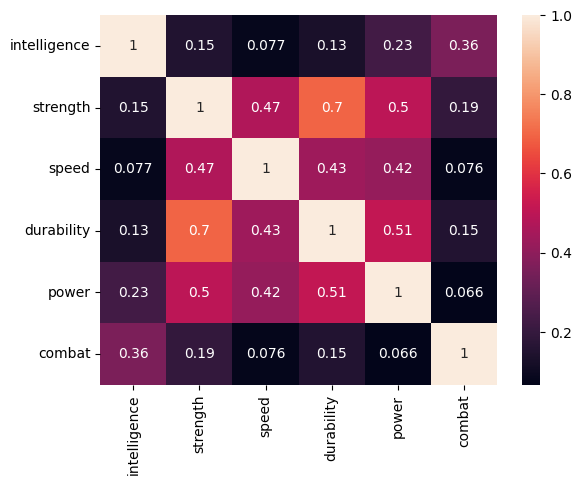

In [91]:
sns.heatmap(datanumber.corr(), annot=True)

<ipython-input-92-050090aa75f5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['intelligence'])


<Axes: xlabel='intelligence', ylabel='Density'>

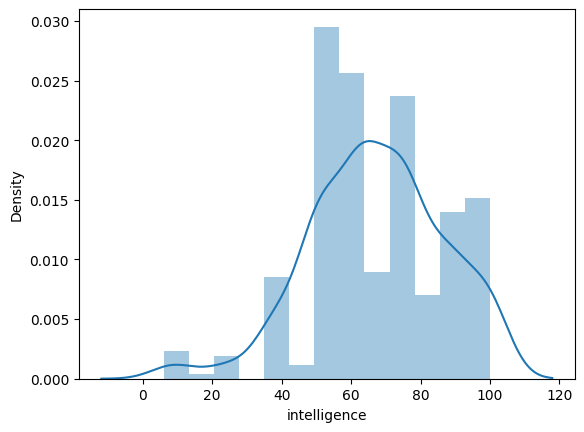

In [92]:
sns.distplot(data['intelligence'])

<ipython-input-93-fdcc494e6244>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['strength'])


<Axes: xlabel='strength', ylabel='Density'>

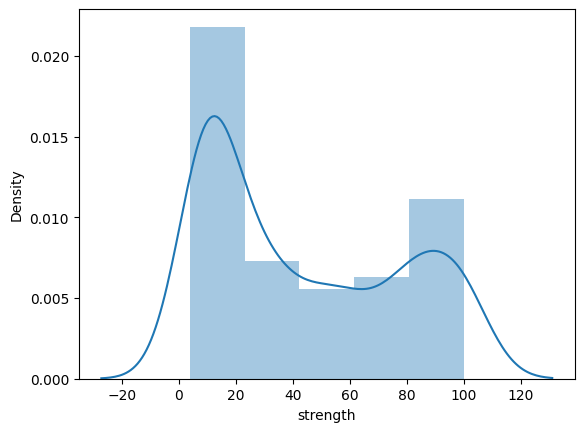

In [93]:
sns.distplot(data['strength'])

<ipython-input-94-4ec44d40b21d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['speed'])


<Axes: xlabel='speed', ylabel='Density'>

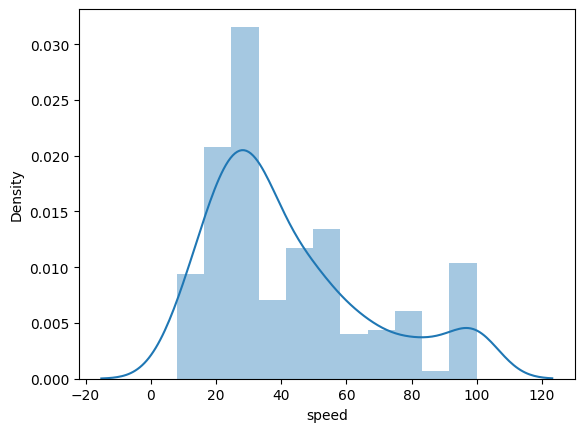

In [94]:
sns.distplot(data['speed'])

<ipython-input-95-005343b0ae51>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['durability'])


<Axes: xlabel='durability', ylabel='Density'>

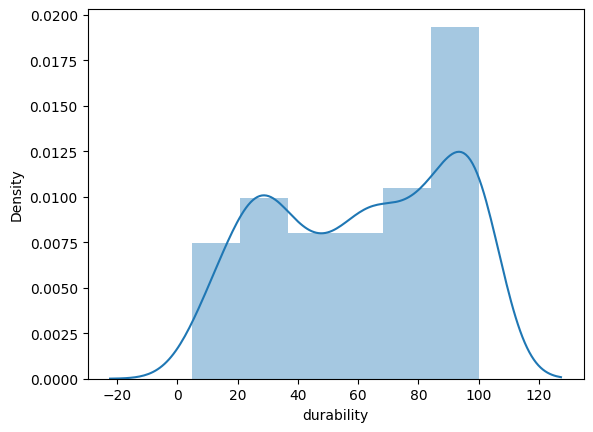

In [95]:
sns.distplot(data['durability'])

<ipython-input-96-18a8d0781b54>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['power'])


<Axes: xlabel='power', ylabel='Density'>

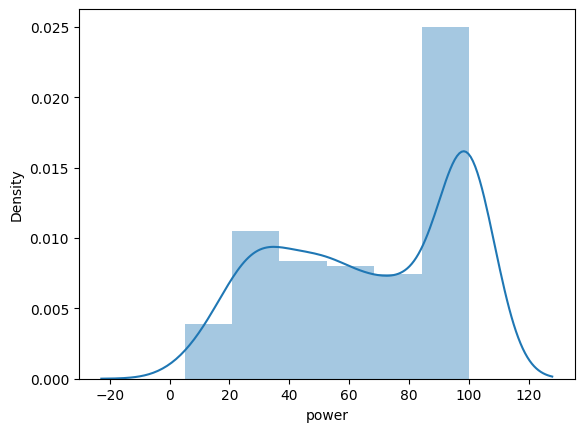

In [96]:
sns.distplot(data['power'])

<ipython-input-97-d9726f53052a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['combat'])


<Axes: xlabel='combat', ylabel='Density'>

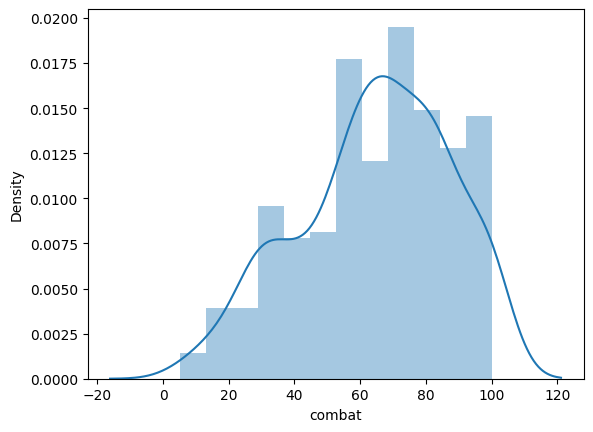

In [97]:
sns.distplot(data['combat'])

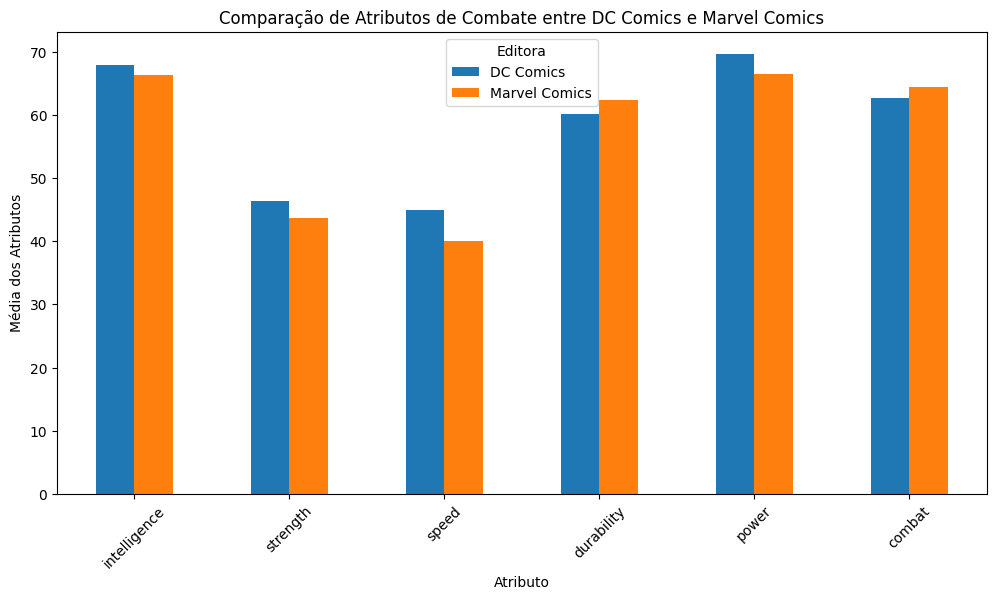

In [98]:
filtered_data = data[data['publisher'].isin(['DC Comics', 'Marvel Comics'])]

# Calcular a média dos atributos de combate para cada editora
combat_attributes = ['intelligence', 'strength', 'speed', 'durability', 'power', 'combat']
mean_attributes = filtered_data.groupby('publisher')[combat_attributes].mean()

# Plotar o gráfico de barras para comparar as médias
mean_attributes.T.plot(kind='bar', figsize=(12, 6), color=['#1f77b4', '#ff7f0e'])
plt.title("Comparação de Atributos de Combate entre DC Comics e Marvel Comics")
plt.ylabel("Média dos Atributos")
plt.xlabel("Atributo")
plt.xticks(rotation=45)
plt.legend(title="Editora")
plt.show()

## Criação de IA

### LM

In [99]:
features = ['intelligence', 'strength', 'speed', 'durability', 'power', 'combat']
X = data[features]
y = data['alignment']
X = X.fillna(X.mean())

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [101]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [102]:
y_pred = model.predict(X_test)

In [103]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(accuracy)
print(report)

0.625
              precision    recall  f1-score   support

           -       0.00      0.00      0.00         1
         bad       0.33      0.15      0.21        20
        good       0.68      0.88      0.76        48
     neutral       0.00      0.00      0.00         3

    accuracy                           0.62        72
   macro avg       0.25      0.26      0.24        72
weighted avg       0.54      0.62      0.57        72



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Perguntas e Respostas do dataset

### 1. Quais são as principais características dos super-heróis no dataset?

**Resposta:** As principais características dos super-heróis no dataset incluem:
- `intelligence`: Nível de inteligência do super-herói.
- `strength`: Nível de força do super-herói.
- `speed`: Nível de velocidade do super-herói.
- `durability`: Nível de durabilidade do super-herói.
- `power`: Nível de poder do super-herói.
- `combat`: Nível de habilidade de combate do super-herói.

### 2. Quantos super-heróis estão presentes no dataset?

**Resposta:** O dataset contém informações sobre 734 super-heróis.

### 3. Quais são os valores possíveis para a coluna `alignment`?

**Resposta:** A coluna `alignment` indica o alinhamento moral dos super-heróis e pode ter os seguintes valores:
- `good`: Super-heróis com alinhamento bom.
- `bad`: Super-heróis com alinhamento mau.
- `neutral`: Super-heróis com alinhamento neutro.

### 4. Qual é a distribuição dos super-heróis por gênero?

**Resposta:** A distribuição dos super-heróis por gênero é a seguinte:
- Masculino: 505 super-heróis.
- Feminino: 198 super-heróis.
- Outros/Não especificado: 31 super-heróis.

### 5. Quais são os super-heróis com os níveis mais altos de inteligência?

**Resposta:** Os super-heróis com os níveis mais altos de inteligência (100) incluem:
- Reed Richards
- Victor von Doom
- Bruce Wayne
- Tony Stark

### 6. Quais são os super-heróis com os níveis mais altos de força?

**Resposta:** Os super-heróis com os níveis mais altos de força (100) incluem:
- Hulk
- Thor
- Superman
- Wonder Woman

### 7. Qual é a média de durabilidade dos super-heróis?

**Resposta:** A média de durabilidade dos super-heróis no dataset é aproximadamente 65.

### 8. Quais são os super-heróis com os níveis mais altos de poder?

**Resposta:** Os super-heróis com os níveis mais altos de poder (100) incluem:
- Thor
- Doctor Strange
- Silver Surfer
- Phoenix

### 9. Qual é a distribuição dos super-heróis por raça?

**Resposta:** A distribuição dos super-heróis por raça inclui várias categorias, como:
- Humano: 349 super-heróis.
- Mutante: 123 super-heróis.
- Alienígena: 67 super-heróis.
- Outros: Diversas raças com menor frequência.

### 10. Quais são os super-heróis com os níveis mais altos de habilidade de combate?

**Resposta:** Os super-heróis com os níveis mais altos de habilidade de combate (100) incluem:
- Batman
- Captain America
- Wolverine
- Black Panther




## IA Generativa neste trabalho
A inteligencia generativa foi utilizada principalmente como auxilio para análises precisas e auxilio para aumentar a velocidade de escrita